## What is the data?

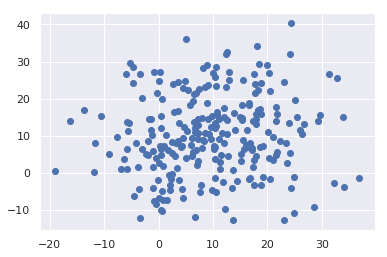

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm 
import seaborn as sns; sns.set()
import numpy as np 
from sklearn.datasets.samples_generator import make_blobs
import pandas as pd 
# X,y_true = make_blobs(n_samples = 400, 
#                       centers = 4, 
#                       cluster_std=0.8, 
#                       random_state=0)
# X = X[:, ::-1]
# print(y_true)

data = pd.read_csv('xclara.csv')
data = data[:250]
X = data.values
y_true = data['V2'].values
plt.scatter(X[:,0],X[:,1])

# K-Means
- ambil sembarang posisi k centroid 
- ambil jarak euclidean minimum dari $$ \arg \min_{c_i \in C} dist(c_{i},x)^2$$  
- ambil centroid baru dengan menghitung rata-rata dari seluruh point yang assign ke dalam cluster lama $$ c_{i} = \frac{1}{S_{i}} \sum_{x_{i} \in s_{i}} $$   
- repeat until it converges

## checking convergency
![](https://i.imgur.com/k3o6NxK.jpg)


**pisahkan label sebagai y, X sebagai training data**

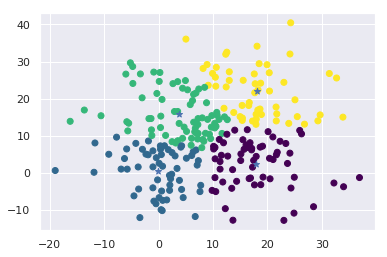

In [2]:
from sklearn.cluster import KMeans
kmeans = KMeans(init='random',n_clusters=4, random_state=0)
labels = kmeans.fit(X).predict(X)
centers = kmeans.cluster_centers_
plt.scatter(X[:,0],X[:,1],c=labels,cmap='viridis')
plt.scatter(centers[:,0],centers[:,1],s=40,marker='*')

**visualize**

# Hierarchical Clustering

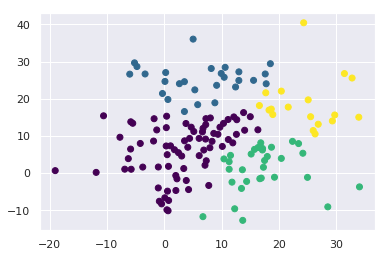

In [19]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  

cluster.fit_predict(X_train)
plt.scatter(X_train[:,0],X_train[:,1], c=cluster.labels_, cmap='viridis')  

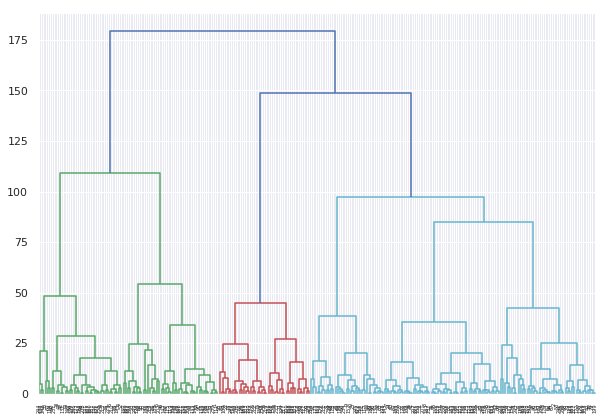

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage  

linked = linkage(X,method='ward')
labelList = range(len(X))

plt.figure(figsize=(10, 7))  
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
          truncate_mode='level')
plt.show()  